In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.tsa as tsa
from sklearn.metrics import r2_score
%matplotlib inline

In [3]:
uber_aug14 = pd.read_csv("../data/uber/uber-trip-data/uber-raw-data-aug14.csv")
uber_aug14.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


In [4]:
uber_aug14["Date/Time"] = pd.to_datetime(uber_aug14["Date/Time"])
uber_aug14.head()

,Date/Time,Lat,Lon,Base
0,2014-08-01 00:03:00,40.7366,-73.9906,B02512
1,2014-08-01 00:09:00,40.7260,-73.9918,B02512
2,2014-08-01 00:12:00,40.7209,-74.0507,B02512
3,2014-08-01 00:12:00,40.7387,-73.9856,B02512
4,2014-08-01 00:12:00,40.7323,-74.0077,B02512


In [7]:
uber_aug14["Count"] = 1

In [16]:
total_per_hour = uber_aug14[["Date/Time", "Count"]].groupby([uber_aug14["Date/Time"].dt.hour]).sum()
total_per_hour.head()

,Count
Date/Time,
0,21451
1,14471
2,10105
3,10376
4,11774


In [22]:
average_per_hour = total_per_hour
average_per_hour["Count"] = average_per_hour["Count"] / 31

In [25]:
uber_aug14["DayOfWeek"] = uber_aug14["Date/Time"].dt.weekday
uber_aug14

,Date/Time,Lat,Lon,Base,Count,DayOfWeek
0,2014-08-01 00:03:00,40.7366,-73.9906,B02512,1,4
1,2014-08-01 00:09:00,40.7260,-73.9918,B02512,1,4
2,2014-08-01 00:12:00,40.7209,-74.0507,B02512,1,4
3,2014-08-01 00:12:00,40.7387,-73.9856,B02512,1,4
4,2014-08-01 00:12:00,40.7323,-74.0077,B02512,1,4
...,...,...,...,...,...,...
829270,2014-08-31 23:55:00,40.7552,-73.9753,B02764,1,6
829271,2014-08-31 23:55:00,40.7552,-73.9753,B02764,1,6
829272,2014-08-31 23:55:00,40.7617,-73.9788,B02764,1,6
829273,2014-08-31 23:59:00,40.7395,-73.9889,B02764,1,6


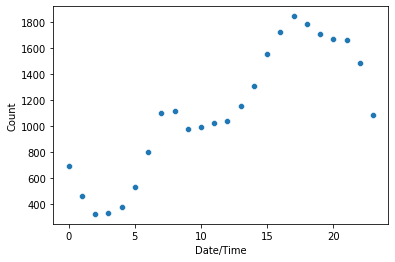

In [26]:
sns.scatterplot(data=average_per_hour, x = "Date/Time", y = "Count")
plt.show()

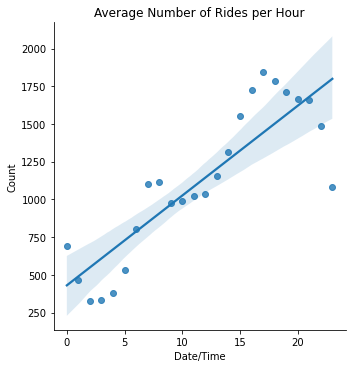

In [71]:
sns.lmplot(data=average_per_hour.reset_index(), x = "Date/Time", y="Count")
plt.title("Average Number of Rides per Hour")
plt.show()

In [72]:
average_per_hour.reset_index()["Date/Time"].corr(average_per_hour.reset_index()["Count"])

0.8581410656292473

In [29]:
uber_aug14.DayOfWeek.unique()

array([4, 5, 6, 0, 1, 2, 3])

In [31]:
weekends = uber_aug14[uber_aug14.DayOfWeek > 4]
weekdays = uber_aug14[uber_aug14.DayOfWeek <= 4]

In [43]:
total_per_hour_weekends = weekends[["Date/Time", "Count"]].groupby([uber_aug14["Date/Time"].dt.hour]).sum()
total_per_hour_weekdays = weekdays[["Date/Time", "Count"]].groupby([uber_aug14["Date/Time"].dt.hour]).sum()

In [44]:
average_per_hour_weekends = total_per_hour_weekends
average_per_hour_weekends["Count"] = average_per_hour_weekends["Count"] / 31
average_per_hour_weekends["Weekends"] = "Weekend"
average_per_hour_weekdays = total_per_hour_weekdays
average_per_hour_weekends["Count"] = average_per_hour_weekends["Count"] / 31
average_per_hour_weekdays["Weekends"] = "Weekday"

In [45]:
average_per_hour_weekdays.head()

,Count,Weekends
Date/Time,,
0,9194,Weekday
1,5503,Weekday
2,3809,Weekday
3,5684,Weekday
4,8451,Weekday


In [46]:
average_per_hour_weekends.head()

,Count,Weekends
Date/Time,,
0,12.754422,Weekend
1,9.331946,Weekend
2,6.551509,Weekend
3,4.882414,Weekend
4,3.457856,Weekend


In [47]:
grouped_by_day = pd.concat([average_per_hour_weekdays, average_per_hour_weekends])

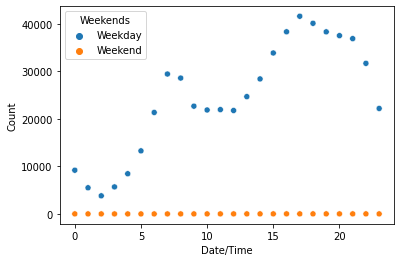

In [48]:
sns.scatterplot(data=grouped_by_day, x = "Date/Time", y = "Count", hue="Weekends")
plt.show()

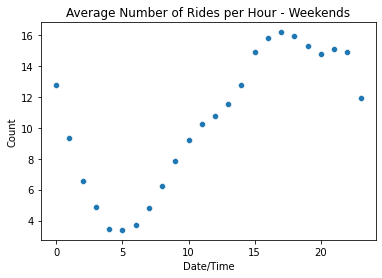

In [51]:
sns.scatterplot(data=average_per_hour_weekends, x = "Date/Time", y = "Count")
plt.title("Average Number of Rides per Hour - Weekends")
plt.show()

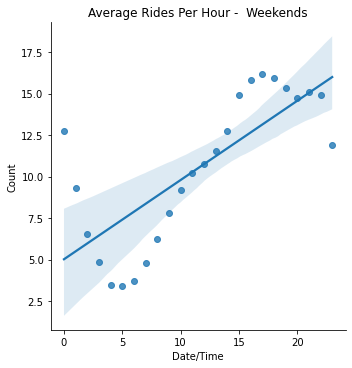

In [66]:
sns.lmplot(data=average_per_hour_weekends.reset_index(), x = "Date/Time", y = "Count")
plt.title("Average Rides Per Hour -  Weekends")
plt.show()

In [59]:
average_per_hour_weekends.reset_index()["Date/Time"].corr(average_per_hour_weekends.reset_index()["Count"])

0.7556168710005706

In [60]:
average_per_hour_weekdays.reset_index()["Date/Time"].corr(average_per_hour_weekdays.reset_index()["Count"])

0.8271171776464317

In [76]:
r2_score(average_per_hour_weekdays.reset_index()["Date/Time"], average_per_hour_weekdays.reset_index()["Count"])

-15272214.246956522

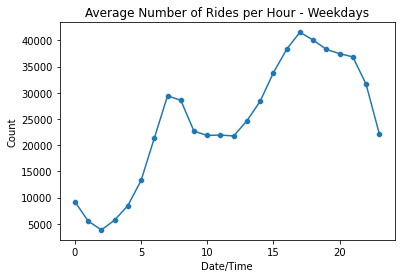

In [69]:
sns.scatterplot(data=average_per_hour_weekdays, x = "Date/Time", y = "Count")
sns.lineplot(data=average_per_hour_weekdays, x = "Date/Time", y = "Count")
plt.title("Average Number of Rides per Hour - Weekdays")
plt.show()

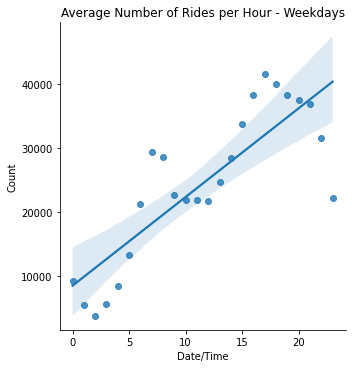

In [67]:
sns.lmplot(data=average_per_hour_weekdays.reset_index(), x = "Date/Time", y = "Count")
plt.title("Average Number of Rides per Hour - Weekdays")
plt.show()